In [1879]:
# importing the requisite libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import statsmodels.api  as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [1880]:
# Model to predict marks given the number of courses taken and the time the student gives to study 
# on a daily basis.
data = pd.read_csv("train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1881]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [1882]:
rows, Cols = data.shape
print(f"Dataset has {rows} rows and {Cols} columns")

Dataset has 1460 rows and 81 columns


In [1883]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [1884]:
#Identifying Percentage of missing values from each Columns
missing_values = (data.isnull().sum()* 100 /len(data))
missing_values.sort_values(ascending = False)

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
FireplaceQu    47.260274
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

In [1885]:
#Removing Columns with more than 60% of missing values(from the above they are next_pymnt_d, mths_since_last_record, mths_since_last_delinq)
#dataframe.describe().columns

data.drop(['PoolQC','MiscFeature','Alley','Fence','Id','MoSold','YrSold','GarageYrBlt','YearBuilt','YearRemodAdd'],axis=1,inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

In [1886]:
#Chekcing if there are any duplicate columns, if exists would be removed
df = data.loc[:,data.columns.duplicated()].copy()
rows,cols = df.shape
print(f"There are {cols} duplicate Columns")

There are 0 duplicate Columns


<AxesSubplot:xlabel='MSZoning', ylabel='count'>

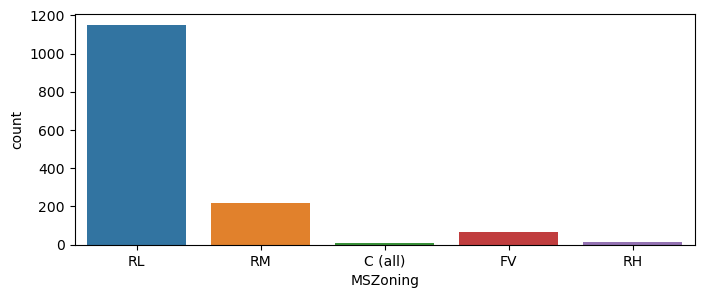

In [1887]:
plt.figure(figsize=(8,3))
sns.countplot(data['MSZoning'])

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

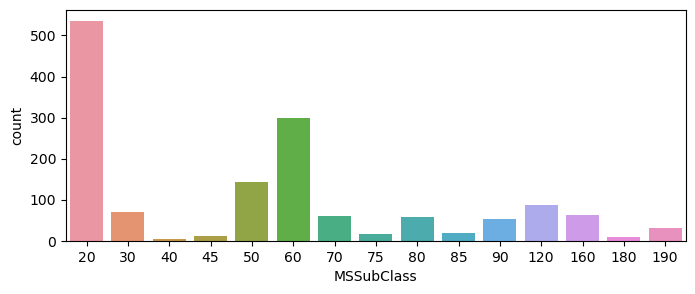

In [1888]:
plt.figure(figsize=(8,3))
sns.countplot(data['MSSubClass'])

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

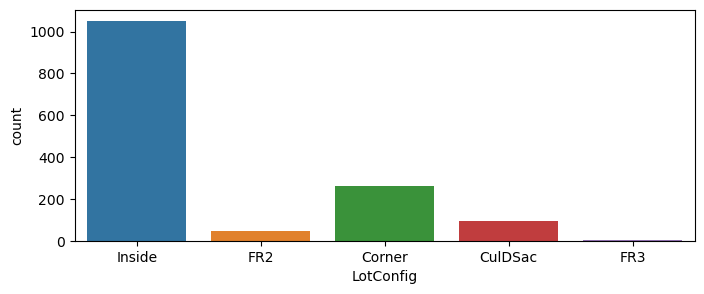

In [1889]:
plt.figure(figsize=(8,3))
sns.countplot(data['LotConfig'])

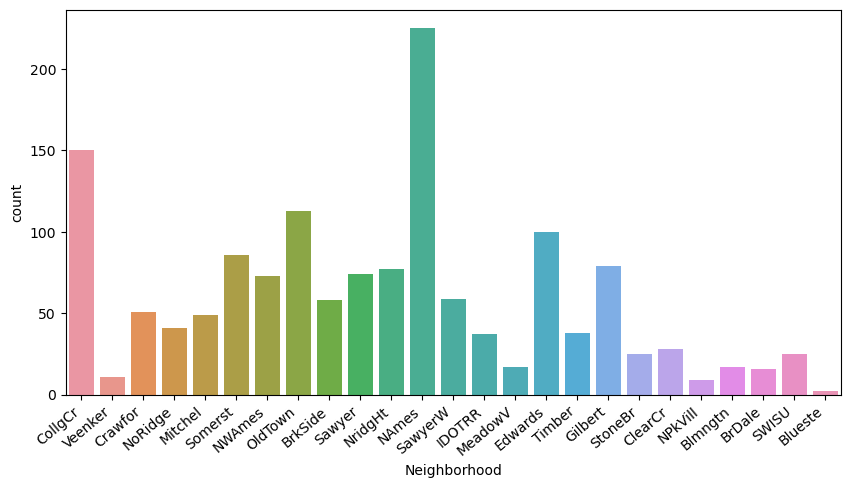

In [1890]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data['Neighborhood'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

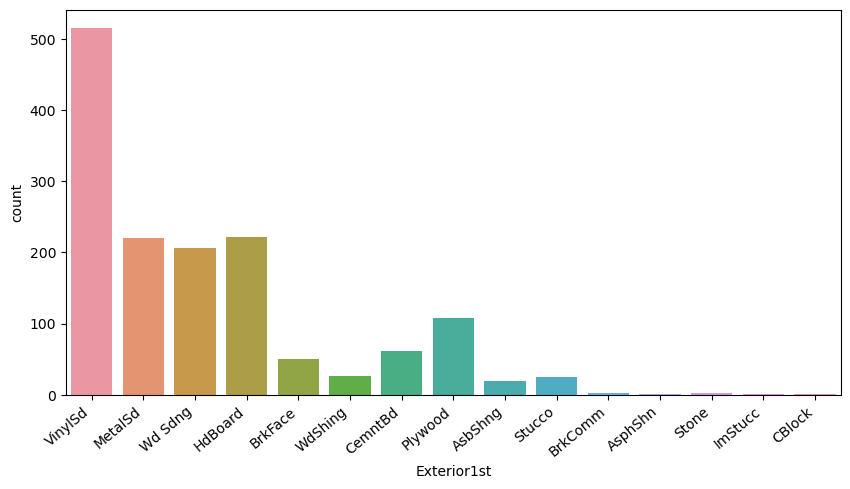

In [1891]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data['Exterior1st'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

In [1892]:
#Creating dummy variables
MSZoning_dummy = pd.get_dummies(data['MSZoning'] )
data = pd.concat([data , MSZoning_dummy] , axis = 1)
data.drop(['MSZoning'],axis=1,inplace = True)

In [1893]:
MSSubClass_dummy = pd.get_dummies(data['MSSubClass'] )
MSSubClass_dummy.rename(columns={20:"dwellingTy20",30:"dwellingTy30", 40:"dwellingTy40" ,45:"dwellingTy45",50:"dwellingTy45"
                             ,60:"dwellingTy60",70:"dwellingTy70",75:"dwellingTy75",80:"dwellingTy80",85:"dwellingTy85",
                             90:"dwellingTy90",120:"dwellingTy120",150:"dwellingTy150",160:"dwellingTy160",
                             180:"dwellingTy180",190:"dwellingTy190"}, inplace=True)
data = pd.concat([data , MSSubClass_dummy] , axis = 1)
data.drop(['MSSubClass'],axis=1,inplace = True)

In [1894]:
Street_dummy = pd.get_dummies(data['Street'] )
Street_dummy.rename(columns={'Grvl':"GrvlStreet",'Pave':"PaveStreet"}, inplace=True)
data = pd.concat([data , Street_dummy] , axis = 1)
data.drop(['Street'],axis=1,inplace = True)

In [1895]:
LotShape_dummy = pd.get_dummies(data['LotShape'] )
data = pd.concat([data , LotShape_dummy] , axis = 1)
data.drop(['LotShape'],axis=1,inplace = True)

In [1896]:
LandContour_dummy = pd.get_dummies(data['LandContour'] )
data = pd.concat([data , LandContour_dummy] , axis = 1)
data.drop(['LandContour'],axis=1,inplace = True)

In [1897]:
Utilities_dummy = pd.get_dummies(data['Utilities'] )
data = pd.concat([data , Utilities_dummy] , axis = 1)
data.drop(['Utilities'],axis=1,inplace = True)

In [1898]:
LotConfig_dummy = pd.get_dummies(data['LotConfig'] )
data = pd.concat([data , LotConfig_dummy] , axis = 1)
data.drop(['LotConfig'],axis=1,inplace = True)

In [1899]:
LandSlope_dummy = pd.get_dummies(data['LandSlope'] )
data = pd.concat([data , LandSlope_dummy] , axis = 1)
data.drop(['LandSlope'],axis=1,inplace = True)

In [1900]:
Neighborhood_dummy = pd.get_dummies(data['Neighborhood'] )
data = pd.concat([data , Neighborhood_dummy] , axis = 1)
data.drop(['Neighborhood'],axis=1,inplace = True)

In [1901]:
Condition1_dummy = pd.get_dummies(data['Condition1'] )
Condition2_dummy = pd.get_dummies(data['Condition2'] )
Condition = Condition1_dummy + Condition2_dummy
data = pd.concat([data , Condition] , axis = 1)
data.drop(['Condition1' , 'Condition2'],axis=1,inplace = True)

In [1902]:
BldgType_dummy = pd.get_dummies(data['BldgType'] )
data = pd.concat([data , BldgType_dummy] , axis = 1)
data.drop(['BldgType'],axis=1,inplace = True)

In [1903]:
HouseStyle_dummy = pd.get_dummies(data['HouseStyle'] )
data = pd.concat([data , HouseStyle_dummy] , axis = 1)
data.drop(['HouseStyle'],axis=1,inplace = True)

In [1904]:
RoofStyle_dummy = pd.get_dummies(data['RoofStyle'] )
data = pd.concat([data , RoofStyle_dummy] , axis = 1)
data.drop(['RoofStyle'],axis=1,inplace = True)

In [1905]:
RoofMatl_dummy = pd.get_dummies(data['RoofMatl'] )
data = pd.concat([data , RoofMatl_dummy] , axis = 1)
data.drop(['RoofMatl'],axis=1,inplace = True)

In [1906]:
Exterior1st_dummy = pd.get_dummies(data['Exterior1st'] )
Exterior2nd_dummy = pd.get_dummies(data['Exterior2nd'] )
Exterior = Exterior1st_dummy + Exterior2nd_dummy
data = pd.concat([data , Exterior] , axis = 1)
data.drop(['Exterior1st' , 'Exterior2nd'],axis=1,inplace = True)

In [1907]:
MasVnrType_dummy = pd.get_dummies(data['MasVnrType'] )
Street_dummy.rename(columns={'BrkCmn':"MasVnrBrkCmn",'BrkFace':"MasVnrBrkFace" , 'CBlock':"MasVnrCBlock" , 'Stone':"MasVnrStone"}, inplace=True)
data = pd.concat([data , MasVnrType_dummy] , axis = 1)
data.drop(['MasVnrType' , 'None'],axis=1,inplace = True)

In [1908]:
#Converting the rating into numbers
data["ExterQual"] = data["ExterQual"].replace('Ex',5)
data["ExterQual"] = data["ExterQual"].replace('Gd',4)
data["ExterQual"] = data["ExterQual"].replace('TA',3)
data["ExterQual"] = data["ExterQual"].replace('Fa',2)
data["ExterQual"] = data["ExterQual"].replace('Po',1)

In [1909]:
data["ExterCond"] = data["ExterCond"].replace('Ex',5)
data["ExterCond"] = data["ExterCond"].replace('Gd',4)
data["ExterCond"] = data["ExterCond"].replace('TA',3)
data["ExterCond"] = data["ExterCond"].replace('Fa',2)
data["ExterCond"] = data["ExterCond"].replace('Po',1)

In [1910]:
Foundation_dummy = pd.get_dummies(data['Foundation'] )
data = pd.concat([data , Foundation_dummy] , axis = 1)
data.drop(['Foundation'],axis=1,inplace = True)

In [1911]:
data["BsmtQual"] = data["BsmtQual"].replace('Ex',5)
data["BsmtQual"] = data["BsmtQual"].replace('Gd',4)
data["BsmtQual"] = data["BsmtQual"].replace('TA',3)
data["BsmtQual"] = data["BsmtQual"].replace('Fa',2)
data["BsmtQual"] = data["BsmtQual"].replace('Po',1)
data["BsmtQual"] = data["BsmtQual"].replace('NA',0)

In [1912]:
data["BsmtCond"] = data["BsmtCond"].replace('Ex',5)
data["BsmtCond"] = data["BsmtCond"].replace('Gd',4)
data["BsmtCond"] = data["BsmtCond"].replace('TA',3)
data["BsmtCond"] = data["BsmtCond"].replace('Fa',2)
data["BsmtCond"] = data["BsmtCond"].replace('Po',1)
data["BsmtCond"] = data["BsmtCond"].replace('NA',0)

In [1913]:
data["BsmtExposure"] = data["BsmtExposure"].replace('Gd',4)
data["BsmtExposure"] = data["BsmtExposure"].replace('Av',3)
data["BsmtExposure"] = data["BsmtExposure"].replace('Mn',2)
data["BsmtExposure"] = data["BsmtExposure"].replace('No',1)
data["BsmtExposure"] = data["BsmtExposure"].replace('Na',0)

In [1914]:
data["BsmtFinType1"] = data["BsmtFinType1"].replace('GLQ',6)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('ALQ',5)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('BLQ',4)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('Rec',3)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('LwQ',2)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('Unf',1)
data["BsmtFinType1"] = data["BsmtFinType1"].replace('NA',0)

In [1915]:
data["BsmtFinType2"] = data["BsmtFinType2"].replace('GLQ',6)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('ALQ',5)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('BLQ',4)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('Rec',3)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('LwQ',2)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('Unf',1)
data["BsmtFinType2"] = data["BsmtFinType2"].replace('NA',0)

In [1916]:
Heating_dummy = pd.get_dummies(data['Heating'] )
data = pd.concat([data , Heating_dummy] , axis = 1)
data.drop(['Heating'],axis=1,inplace = True)

In [1917]:
data["HeatingQC"] = data["HeatingQC"].replace('Ex',5)
data["HeatingQC"] = data["HeatingQC"].replace('Gd',4)
data["HeatingQC"] = data["HeatingQC"].replace('TA',3)
data["HeatingQC"] = data["HeatingQC"].replace('Fa',2)
data["HeatingQC"] = data["HeatingQC"].replace('Po',1)

In [1918]:
data["CentralAir"] = data["CentralAir"].replace('Y',1)
data["CentralAir"] = data["CentralAir"].replace('N',0)

In [1919]:
Electrical_dummy = pd.get_dummies(data['Electrical'] )
data = pd.concat([data , Electrical_dummy] , axis = 1)
data.drop(['Electrical'],axis=1,inplace = True)

In [1920]:
data["KitchenQual"] = data["KitchenQual"].replace('Ex',5)
data["KitchenQual"] = data["KitchenQual"].replace('Gd',4)
data["KitchenQual"] = data["KitchenQual"].replace('TA',3)
data["KitchenQual"] = data["KitchenQual"].replace('Fa',2)
data["KitchenQual"] = data["KitchenQual"].replace('Po',1)

In [1921]:
Functional_dummy = pd.get_dummies(data['Functional'] )
data = pd.concat([data , Functional_dummy] , axis = 1)
data.drop(['Functional'],axis=1,inplace = True)

In [1922]:
data["FireplaceQu"] = data["FireplaceQu"].replace('Ex',5)
data["FireplaceQu"] = data["FireplaceQu"].replace('Gd',4)
data["FireplaceQu"] = data["FireplaceQu"].replace('TA',3)
data["FireplaceQu"] = data["FireplaceQu"].replace('Fa',2)
data["FireplaceQu"] = data["FireplaceQu"].replace('Po',1)
data["FireplaceQu"] = data["FireplaceQu"].replace('NA',0)

In [1923]:
GarageType_dummy = pd.get_dummies(data['GarageType'] )
data = pd.concat([data , GarageType_dummy] , axis = 1)
data.drop(['GarageType'],axis=1,inplace = True)

In [1924]:
data["GarageFinish"] = data["GarageFinish"].replace('Fin',3)
data["GarageFinish"] = data["GarageFinish"].replace('RFn',2)
data["GarageFinish"] = data["GarageFinish"].replace('Unf',1)
data["GarageFinish"] = data["GarageFinish"].replace('NA',0)

In [1925]:
data["GarageQual"] = data["GarageQual"].replace('Ex',5)
data["GarageQual"] = data["GarageQual"].replace('Gd',4)
data["GarageQual"] = data["GarageQual"].replace('TA',3)
data["GarageQual"] = data["GarageQual"].replace('Fa',2)
data["GarageQual"] = data["GarageQual"].replace('Po',1)
data["GarageQual"] = data["GarageQual"].replace('NA',0)

In [1926]:
data["GarageCond"] = data["GarageCond"].replace('Ex',5)
data["GarageCond"] = data["GarageCond"].replace('Gd',4)
data["GarageCond"] = data["GarageCond"].replace('TA',3)
data["GarageCond"] = data["GarageCond"].replace('Fa',2)
data["GarageCond"] = data["GarageCond"].replace('Po',1)
data["GarageCond"] = data["GarageCond"].replace('NA',0)

In [1927]:
data["PavedDrive"] = data["PavedDrive"].replace('Y',2)
data["PavedDrive"] = data["PavedDrive"].replace('P',1)
data["PavedDrive"] = data["PavedDrive"].replace('N',0)

In [1928]:
SaleType_dummy = pd.get_dummies(data['SaleType'] )
data = pd.concat([data , SaleType_dummy] , axis = 1)
data.drop(['SaleType'],axis=1,inplace = True)

In [1929]:
SaleCondition_dummy = pd.get_dummies(data['SaleCondition'] )
data = pd.concat([data , SaleCondition_dummy] , axis = 1)
data.drop(['SaleCondition'],axis=1,inplace = True)

In [1930]:
num_vars= ['ExterQual' , 'PavedDrive' , 'GarageCond' , 'GarageQual' , 'GarageFinish' , 'FireplaceQu' ,'KitchenQual' , 
           'HeatingQC' ,'BsmtFinType2' , 'ExterCond' , 'ExterQual' , 'BsmtQual' ,'BsmtCond', 'BsmtExposure' , 'BsmtFinType1' ,
           'LotFrontage' , 'LotArea' , 'MasVnrArea' , 'BsmtFinSF1' ,'BsmtFinSF2' , 'BsmtUnfSF' ,'TotalBsmtSF' , '1stFlrSF',
           '2ndFlrSF' ,'LowQualFinSF' , 'GrLivArea' ,'BsmtFullBath' , 'BsmtHalfBath' , 'FullBath' , 'HalfBath' , 'BedroomAbvGr',
           'KitchenAbvGr' , 'TotRmsAbvGrd' ,'Fireplaces' ,'GarageCars' ,'GarageArea' , 'WoodDeckSF' , 'OpenPorchSF' ,
           'EnclosedPorch','3SsnPorch' ,'ScreenPorch' ,'PoolArea' ,'MiscVal' ]

In [1931]:
#tranforming the data so that evalution can be done properly
scaler = MinMaxScaler()
data[num_vars] = scaler.fit_transform(data[num_vars])

In [1932]:
float_vars = data.select_dtypes(include=[float])
print(float_vars.columns)

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'RRNe', 'Brk Cmn', 'BrkComm',
       'CemntBd', 'CmentBd', 'Other', 'Wd Shng', 'WdShing'],
      dtype='object')


In [1933]:
data[float_vars.columns] = data[float_vars.columns].replace(np.nan, 0)
data[float_vars.columns].isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
FireplaceQu      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
RRNe             0
Brk Cmn          0
BrkComm          0
CemntBd          0
CmentBd          0
Other            0
Wd Shng          0
WdShing          0
dtype: int64

In [1934]:
data.shape

(1460, 214)

In [1935]:
df_train , df_test = train_test_split(data , train_size = 0.7 , random_state = 100)

In [1936]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [1937]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm )             # running RFE
rfe = rfe.fit(X_train, y_train)

In [1938]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 89),
 ('LotArea', False, 37),
 ('OverallQual', False, 64),
 ('OverallCond', False, 74),
 ('MasVnrArea', False, 53),
 ('ExterQual', False, 38),
 ('ExterCond', False, 77),
 ('BsmtQual', False, 42),
 ('BsmtCond', False, 62),
 ('BsmtExposure', False, 54),
 ('BsmtFinType1', False, 97),
 ('BsmtFinSF1', False, 32),
 ('BsmtFinType2', False, 86),
 ('BsmtFinSF2', False, 34),
 ('BsmtUnfSF', False, 33),
 ('TotalBsmtSF', False, 31),
 ('HeatingQC', False, 84),
 ('CentralAir', False, 92),
 ('1stFlrSF', False, 27),
 ('2ndFlrSF', False, 28),
 ('LowQualFinSF', False, 30),
 ('GrLivArea', False, 29),
 ('BsmtFullBath', False, 65),
 ('BsmtHalfBath', False, 80),
 ('FullBath', False, 95),
 ('HalfBath', False, 94),
 ('BedroomAbvGr', False, 39),
 ('KitchenAbvGr', False, 35),
 ('KitchenQual', False, 41),
 ('TotRmsAbvGrd', False, 52),
 ('Fireplaces', False, 70),
 ('FireplaceQu', False, 75),
 ('GarageFinish', False, 71),
 ('GarageCars', False, 56),
 ('GarageArea', False, 43),
 ('GarageQual'

In [1939]:
# Selected columns for analysis
columns_analyse = X_train.columns[rfe.support_]
columns_analyse

Index(['dwellingTy90', 'dwellingTy190', 'GrvlStreet', 'PaveStreet', 'IR1',
       'IR2', 'IR3', 'Reg', 'Bnk', 'HLS',
       ...
       'Sev', 'Typ', 'ConLw', 'New', 'Oth', 'Abnorml', 'AdjLand', 'Alloca',
       'Family', 'Normal'],
      dtype='object', length=106)

In [1940]:
X_train_rfe = X_train[columns_analyse]
X_train_rfe.head()

,dwellingTy90,dwellingTy190,GrvlStreet,PaveStreet,IR1,IR2,IR3,Reg,Bnk,HLS,...,Sev,Typ,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
318,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
239,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
986,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1416,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
390,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [1941]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

#summary of the model build
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     22.46
Date:                Sun, 28 May 2023   Prob (F-statistic):          2.67e-177
Time:                        20:07:25   Log-Likelihood:                -12374.
No. Observations:                1021   AIC:                         2.493e+04
Df Residuals:                     930   BIC:                         2.538e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.267e+17   1.08e+17     -1.168      0.243    -3.4e+17    8.62e+16
dwellingTy90    1.28e+16    1.1e+16      1.168      0.243    -8.7e+15    3.43e+16
dwellingTy190   5.37e+15    4.6e+15      1.168      0.243   -3.65e+15    1.44e+16
GrvlStreet    -9.679e+16   8.29e+16     -1.168      0.243   -2.59e+17    6.58e+16
PaveStreet    -9.679e+16   8.29e+16     -1.168      0.243   -2.59e+17    6.58e+16
IR1           -1.566e+16   1.34e+16     -1.168      0.243    -4.2e+16    1.06e+16
IR2           -1.566e+16   1.34e+16     -1.168      0.243    -4.2e+16    1.06e+16
IR3           -1.566e+16   1.34e+16     -1.168      0.243    -4.2e+16    1.06e+16
Reg           -1.566e+16   1.34e+16     -1.168      0.243    -4.2e+16    1.06e+16
Bnk            3.459e+16   2.96e+16      1.168      0.243   -2.35e+16    9.27e+16
HLS            3.459e+16   2.96e+16      1.168      0.243   -2.35e+16    9.27e+16
Low            3.459e+16   2.96e+16      1.168      0.243   -2.35e+16    9.27e+16
Lvl            3.459e+16   2.96e+16      1.168      0.243   -2.35e+16    9.27e+16
AllPub         1.444e+17   1.24e+17      1.168      0.243   -9.82e+16    3.87e+17
NoSeWa         1.444e+17   1.24e+17      1.168      0.243   -9.82e+16    3.87e+17
Corner        -6.754e+15   5.78e+15     -1.168      0.243   -1.81e+16    4.59e+15
CulDSac       -6.754e+15   5.78e+15     -1.168      0.243   -1.81e+16    4.59e+15
FR2           -6.754e+15   5.78e+15     -1.168      0.243   -1.81e+16    4.59e+15
FR3           -6.754e+15   5.78e+15     -1.168      0.243   -1.81e+16    4.59e+15
Inside        -6.754e+15   5.78e+15     -1.168      0.243   -1.81e+16    4.59e+15
Gtl            1.082e+17   9.26e+16      1.168      0.243   -7.36e+16     2.9e+17
Mod            5.131e+16   4.39e+16      1.168      0.243   -3.49e+16    1.37e+17
Mod            1.804e+16   1.54e+16      1.168      0.243   -1.23e+16    4.83e+16
Sev            5.368e+16    4.6e+16      1.168      0.243   -3.65e+16    1.44e+17
Sev            1.962e+16   1.68e+16      1.168      0.243   -1.33e+16    5.26e+16
Blmngtn       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
Blueste       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
BrDale        -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
BrkSide       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
ClearCr       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
CollgCr       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
Crawfor       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
Edwards       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
Gilbert       -1.454e+16   1.24e+16     -1.168      0.243    -3.9e+16    9.89e+15
IDOTRR        -1.454e+16   1.24e+16     -1.168   

In [1942]:
#Removing const variable to calcualte the VIF
X_train_rfe_new=X_train_rfe.copy()
X = X_train_rfe_new.drop('const',axis=1)
X.head()

,dwellingTy90,dwellingTy190,GrvlStreet,PaveStreet,IR1,IR2,IR3,Reg,Bnk,HLS,...,Sev,Typ,ConLw,New,Oth,Abnorml,AdjLand,Alloca,Family,Normal
318,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
239,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
986,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1416,0,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
390,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [1943]:
# Calculate the VIFs for the model created
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,dwellingTy90,inf
84,Stone,inf
80,PConc,inf
79,CBlock,inf
77,BrkTil,inf
...,...,...
82,Stone,1.19
105,ConLw,1.08
107,Oth,1.08
78,CBlock,1.04


In [1944]:
lambdas = [0, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [1946]:
# Ridge Regression
degree = 3
ridgecoef = PolynomialFeatures(degree, include_bias = True)
X_poly = ridgecoef.fit_transform(X)
ridgereg = Ridge(alpha = 1000) # Initialize the Ridge Regression model with a specific lambda
ridgereg.fit(X_poly, y_train) # fit the model on the polynomial features
print(ridgereg.coef_)    
y_pred = ridgereg.predict(ridgecoef.fit_transform(X))


[  0.          -2.73480755   5.84422963 ...   0.           0.
 -64.95191973]


In [1947]:
print("r2 score = " + str(r2_score(y_train, y_pred))) 

r2 score = 0.7312281122984722


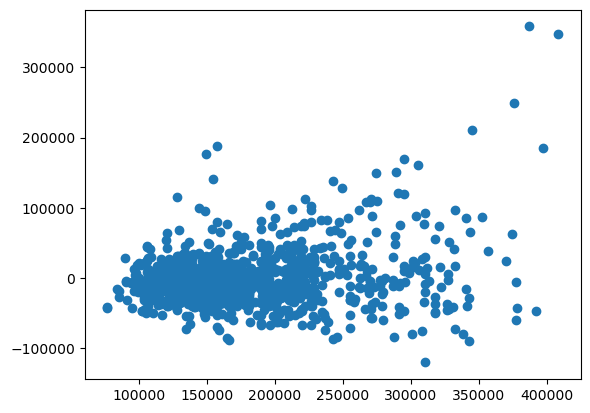

In [1860]:
#Residual Analysis
res = y_train - y_pred
plt.scatter(y_pred,res)
plt.show()

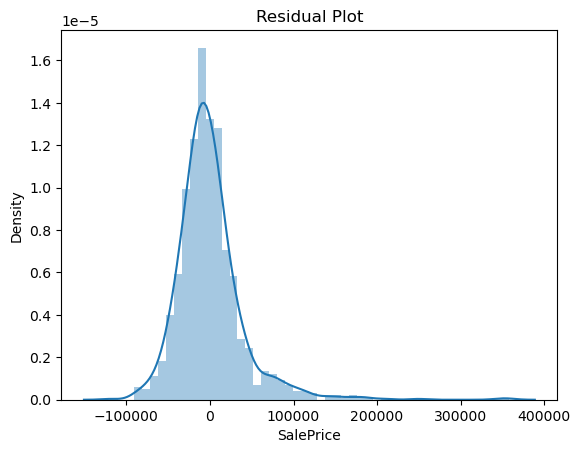

In [1861]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

In [1862]:
# Lasso Regression
degree = 3
lassocoef = PolynomialFeatures(degree) # Creating degree 3 features
X_poly = lassocoef.fit_transform(X)
lassoreg = Lasso(alpha = 1000)
lassoreg.fit(X_poly, y_train)
print(lassoreg.coef_)
y_pred = lassoreg.predict(lassocoef.fit_transform(X))


[ 0.  0. -0. ...  0.  0.  0.]


In [1863]:
print("r2 score = " + str(r2_score(y_train, y_pred)))

r2 score = 0.6094206232031085


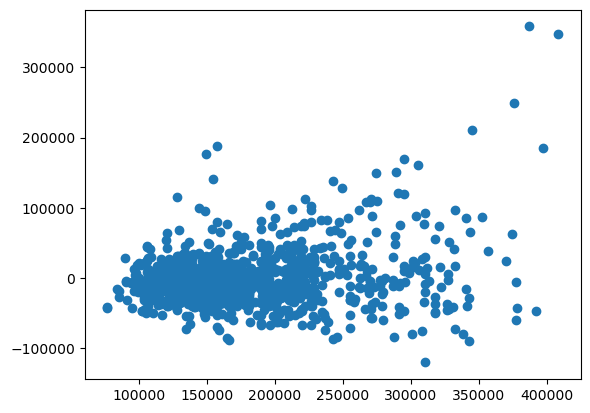

In [1949]:
#Residual Analysis
res = y_train - y_pred
plt.scatter(y_pred,res)
plt.show()

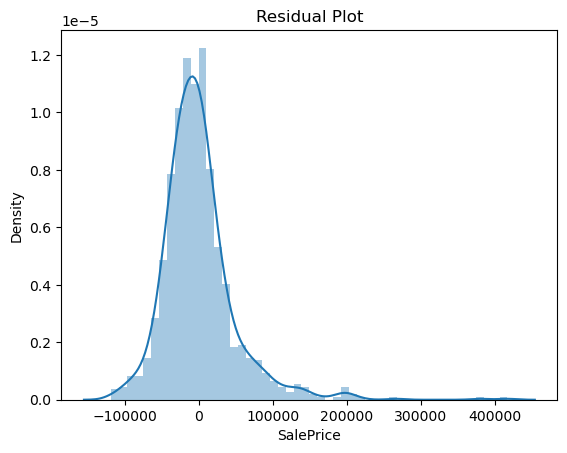

In [1865]:
plt.figure()
sns.distplot(res)
plt.title("Residual Plot")
plt.show()

In [1866]:
#Testing the Model

In [1867]:
#df_test 
y_test = df_test.pop('SalePrice')
X_test = df_test

In [1868]:
model = lm

In [1869]:
X = X_test[columns_analyse]
X = sm.add_constant(X)

In [1870]:
#Ridge Regression testing

In [1871]:
y_test_pred = ridgereg.predict(ridgecoef.fit_transform(X))

In [1872]:
print("r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.6939487810390763


In [1873]:
#Lasso Regression Testing

In [1874]:
y_test_pred = lassoreg.predict(lassocoef.fit_transform(X))

In [1875]:
print("r2 score = " + str(r2_score(y_test, y_test_pred)))

r2 score = 0.5890761799871933
